This notebook is for experimenting with the affects of augmenting the training data.

In [1]:
#imports 
import os, shutil
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from tensorflow.keras import regularizers
import seaborn as sns
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

In [2]:
# strings of directories for the different data
train_images_dir = 'C:/Users/User/Desktop/hand_images/train'
test_images_dir = 'C:/Users/User/Desktop/hand_images/test'

In [5]:
# here I set 3 global variables: target size, batch size and epochs
# I do this because these variables are used quite often, so I wanted to be able to change it one place 
# and have it change everywhere in the rest of the notebook.
global_target_size = (127,127) # The size of the images
global_batch_size = 32 # The size of each batch being fed to the models
global_epochs = 250 # How many times each model should run through the entire dataset

In [4]:
train_val_generator = ImageDataGenerator(rescale=1./255,
                                         validation_split = .25,
                                        horizontal_flip = True,
                                    zoom_range = .05,
                                        height_shift_range = .1)

In [5]:
train_data = train_val_generator.flow_from_directory(train_images_dir,  
                                                     target_size = global_target_size,
                                                     subset='training',
                                                     batch_size=global_batch_size,
                                                     class_mode='binary',
                                                    shuffle = True,
                                                    seed = 42)

Found 582 images belonging to 2 classes.


In [6]:
val_generator_aug = ImageDataGenerator(rescale=1./255,
                                         validation_split = .25)

In [7]:
val_data = val_generator_aug.flow_from_directory(train_images_dir,  
                                                     target_size = global_target_size,
                                                     subset='validation',
                                                     batch_size=global_batch_size,
                                                     class_mode='binary',
                                                    shuffle = True,
                                                    seed = 42)

Found 194 images belonging to 2 classes.


In [6]:
model18 = models.Sequential()

# Stack 1
model18.add(layers.Conv2D(filters = 64,
                         kernel_size=(3,3),
                         activation='relu',
                         input_shape = (global_target_size[0],global_target_size[0], 3),
                         padding = 'same'
                        ))
model18.add(layers.MaxPooling2D(pool_size = (4,4),
                         padding = 'same'))

# Dropout Layer 1
model18.add(layers.Dropout(0.1))

# Stack 2
model18.add(layers.Conv2D(32, (3,3), activation='relu',padding = 'same'))
model18.add(layers.MaxPooling2D((2, 2),
                         padding = 'same'))

# Dropout Layer 2
model18.add(layers.Dropout(0.1))

# Stack 3
model18.add(layers.Conv2D(64, (4,4), activation='relu'))
model18.add(layers.MaxPooling2D((2, 2),
                         padding = 'same'))

# Stack 4
model18.add(layers.Conv2D(128, (3,3), activation='relu',padding='same'))
model18.add(layers.MaxPooling2D((2, 2),
                                padding = 'same'))

# Dropout Layer 3
model18.add(layers.Dropout(0.1))

# Stack 5
model18.add(layers.Conv2D(128, (4,4), activation='relu',padding = 'same'))
model18.add(layers.MaxPooling2D((2, 2),
                         padding = 'same'))

# Dropout Layer 4
model18.add(layers.Dropout(0.1))

# Stack 5
model18.add(layers.Conv2D(256, (4,4), activation='relu',padding = 'same'))
model18.add(layers.MaxPooling2D((2, 2),
                         padding = 'same'))

# Flattening layer
model18.add(layers.Flatten())

# Dense layer 1
model18.add(layers.Dense(64, activation='relu'))

# Dense layer 2 - output layer
model18.add(layers.Dense(1, activation='sigmoid'))

model18.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['acc'])

In [9]:
model18_history = model18.fit(train_data,
                    epochs=global_epochs,
                    validation_data = val_data
                   )

Epoch 1/250
19/19 [==============================] - 23s 1s/step - loss: 0.6955 - acc: 0.5086 - val_loss: 0.6930 - val_acc: 0.5155
Epoch 2/250
19/19 [==============================] - 23s 1s/step - loss: 0.6933 - acc: 0.4502 - val_loss: 0.6929 - val_acc: 0.5155
Epoch 3/250
19/19 [==============================] - 23s 1s/step - loss: 0.6925 - acc: 0.5241 - val_loss: 0.6859 - val_acc: 0.8093
Epoch 4/250
19/19 [==============================] - 22s 1s/step - loss: 0.6880 - acc: 0.5790 - val_loss: 0.6290 - val_acc: 0.7526
Epoch 5/250
19/19 [==============================] - 23s 1s/step - loss: 0.6887 - acc: 0.5722 - val_loss: 0.6436 - val_acc: 0.7887
Epoch 6/250
19/19 [==============================] - 22s 1s/step - loss: 0.6536 - acc: 0.6890 - val_loss: 0.5546 - val_acc: 0.8660
Epoch 7/250
19/19 [==============================] - 22s 1s/step - loss: 0.6084 - acc: 0.6821 - val_loss: 0.4300 - val_acc: 0.8557
Epoch 8/250
19/19 [==============================] - 23s 1s/step - loss: 0.5648 - a

Epoch 125/250
19/19 [==============================] - 22s 1s/step - loss: 0.0325 - acc: 0.9863 - val_loss: 0.3259 - val_acc: 0.9175
Epoch 126/250
19/19 [==============================] - 22s 1s/step - loss: 0.0115 - acc: 0.9948 - val_loss: 0.4373 - val_acc: 0.8969
Epoch 127/250
19/19 [==============================] - 22s 1s/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.4388 - val_acc: 0.9124
Epoch 128/250
19/19 [==============================] - 22s 1s/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.4779 - val_acc: 0.9021
Epoch 129/250
19/19 [==============================] - 22s 1s/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.5136 - val_acc: 0.9021
Epoch 130/250
19/19 [==============================] - 22s 1s/step - loss: 0.0088 - acc: 0.9983 - val_loss: 0.4798 - val_acc: 0.9021
Epoch 131/250
19/19 [==============================] - 22s 1s/step - loss: 0.0044 - acc: 0.9983 - val_loss: 0.4800 - val_acc: 0.9124
Epoch 132/250
19/19 [==============================] - 22s 1s/step - 

19/19 [==============================] - 22s 1s/step - loss: 0.0026 - acc: 0.9983 - val_loss: 0.9281 - val_acc: 0.8557
Epoch 248/250
19/19 [==============================] - 22s 1s/step - loss: 0.0373 - acc: 0.9897 - val_loss: 0.5702 - val_acc: 0.8763
Epoch 249/250
19/19 [==============================] - 22s 1s/step - loss: 0.0127 - acc: 0.9983 - val_loss: 0.6889 - val_acc: 0.8866
Epoch 250/250
19/19 [==============================] - 22s 1s/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.6990 - val_acc: 0.8814


In [7]:
model18.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 127, 127, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)       

In [10]:
model_18_train_results = model18.evaluate(train_data)
model_18_train_results

model_18_val_results = model18.evaluate(val_data)
model_18_val_results

7/7 [==============================] - 3s 361ms/step - loss: 0.6990 - acc: 0.8814


[0.6990464925765991, 0.8814433217048645]

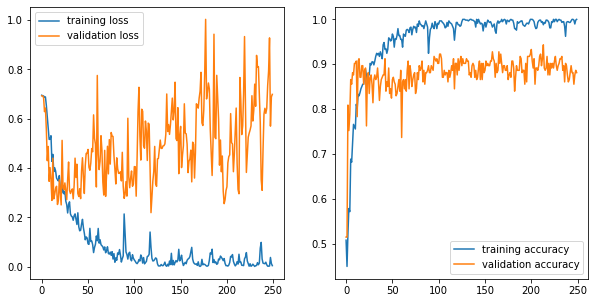

In [11]:
# visualizing loss and accuracy per epoch
model18_train_loss = model18_history.history['loss']
model18_train_acc = model18_history.history['acc']
model18_val_loss = model18_history.history['val_loss']
model18_val_acc = model18_history.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(x=model18_history.epoch, y=model18_train_loss, ax=ax1, label='training loss')
sns.lineplot(x=model18_history.epoch, y=model18_train_acc, ax=ax2, label='training accuracy')

sns.lineplot(x=model18_history.epoch, y=model18_val_loss, ax=ax1, label='validation loss')
sns.lineplot(x=model18_history.epoch, y=model18_val_acc, ax=ax2, label='validation accuracy');

# Testing Data

In [13]:
test_generator = ImageDataGenerator(rescale=1./255)

In [14]:
test_data = test_generator.flow_from_directory(test_images_dir,  
                                                     target_size = global_target_size,
                                                     batch_size=global_batch_size,
                                                     class_mode='binary',
                                                    shuffle = False,
                                                    seed = 42)

Found 239 images belonging to 2 classes.


In [15]:
test_score =  model18.evaluate(test_data)
test_score

8/8 [==============================] - 9s 1s/step - loss: 2.2532 - acc: 0.7364


[2.253230094909668, 0.7364016771316528]